In [9]:
import pandas as pd
import numpy as np
import os
import networkx as nx
import random
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from pylab import rcParams
rcParams['figure.figsize'] = 18, 15
%matplotlib inline

In [58]:
user_ids = os.listdir("followers")
random_users = random.sample(user_ids, 2)

In [59]:
result = []
for i, user_id in enumerate(random_users):
    try:
        followers = pd.read_csv("followers/" + random_users[i] + "/2019__10__" + random_users[i] + ".csv")["user_id_followers"].values

        for follower in followers:
            result.append({
                "node_1": user_id,
                "node_2": follower
            })
    except Exception as e:
        print("fail")

In [60]:
h = pd.DataFrame(result)
r = np.concatenate((h["node_1"].unique(),h["node_2"].unique()), axis=0)
rl = r.tolist()
h["node_1"] = h["node_1"].apply(lambda x: rl.index(x))
h["node_2"] = h["node_2"].apply(lambda x: rl.index(x))

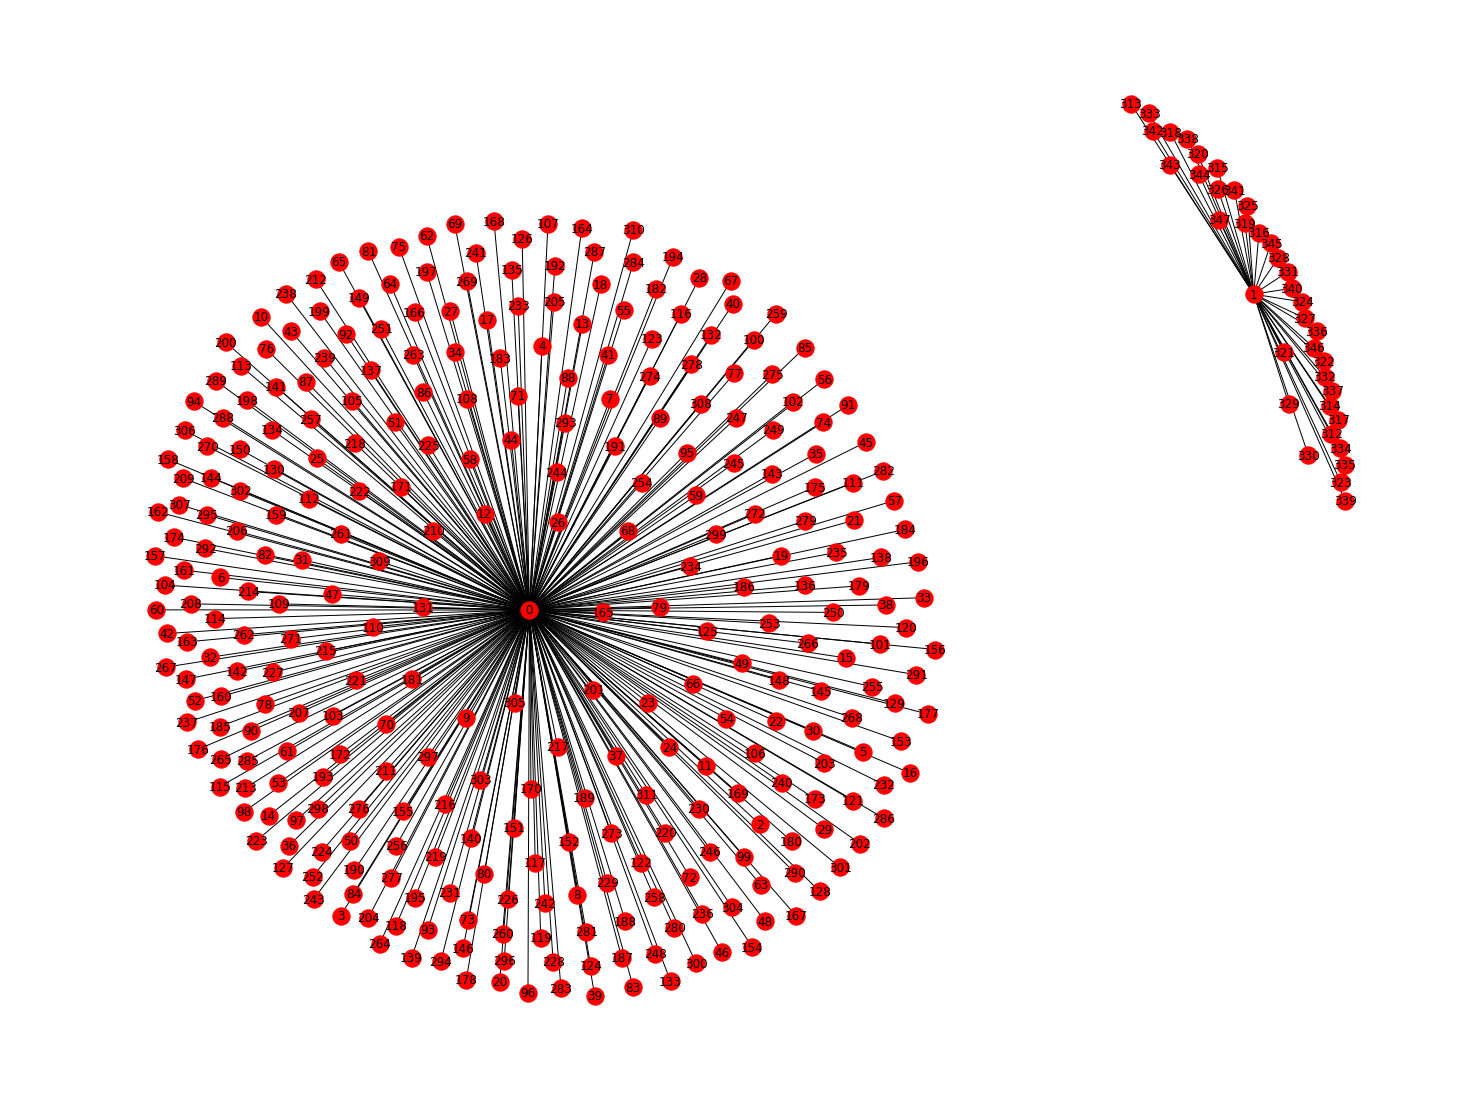

In [70]:
g = nx.from_edgelist(h.values.tolist())
nx.draw(g, with_labels=True)

In [80]:
h.to_csv("followerified_sub20.csv", index=False)

In [81]:
embedding = pd.read_csv("M-NMF/follower-embedding20.csv")

In [74]:
h

,node_1,node_2
0,0,2
1,0,3
2,0,4
3,0,5
4,0,6
...,...,...
341,1,343
342,1,344
343,1,345
344,1,346


In [82]:
embedding

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,2.003392e-02,3.410505e-01,3.001619e-02,0.014163,0.161369,2.668643e-01,2.935308e-01,3.728282e-01,3.138944e-01,3.418619e-01,0.275941,3.253623e-01,0.049735,3.075993e-01,2.166375e-01,1.354175e-01
1,2.775917e-01,1.610311e-01,9.792339e-02,0.199125,0.285843,3.447620e-01,6.705176e-02,1.390784e-01,4.298813e-01,4.245599e-01,0.325467,2.955900e-02,0.117599,2.996692e-01,1.743329e-01,1.322560e-01
2,1.513384e-01,2.963694e-01,6.964078e-02,0.235133,0.056742,3.989711e-01,1.708754e-01,1.851770e-01,3.626810e-01,1.809752e-01,0.217561,3.550369e-01,0.038866,1.939674e-01,2.352853e-01,4.136079e-01
3,5.840870e-02,3.298891e-01,1.658005e-01,0.125630,0.123259,1.865074e-01,2.042290e-01,3.299537e-01,5.078701e-01,1.205063e-01,0.022787,1.088842e-01,0.107556,5.161999e-01,6.528538e-02,2.771473e-01
4,3.840706e-01,2.935560e-01,9.247400e-02,0.051865,0.131612,2.055464e-01,1.159288e-01,3.914078e-01,3.022606e-01,3.019832e-01,0.075565,3.979449e-01,0.035756,8.254367e-02,2.781868e-01,3.110582e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,6.401753e-13,1.448168e-12,1.803205e-06,0.231860,0.000077,1.806230e-10,1.252007e-11,5.820041e-10,7.460681e-13,1.296367e-12,0.000502,1.233522e-10,0.972749,3.484381e-12,1.060349e-08,1.034973e-12
344,7.460272e-13,9.614287e-14,7.196709e-07,0.127001,0.000110,4.841219e-10,1.153414e-11,2.811141e-10,4.182228e-12,1.745044e-12,0.000030,9.863694e-12,0.991903,2.284680e-13,1.858814e-09,1.378588e-11
345,2.591538e-14,3.318237e-14,2.832967e-08,0.140841,0.000224,1.074706e-10,2.926167e-12,8.198592e-11,2.062986e-13,2.708198e-12,0.000473,1.129370e-11,0.990032,5.695604e-13,4.794579e-09,2.726104e-12
346,8.758004e-13,2.635372e-13,4.008727e-08,0.147386,0.000133,9.818542e-10,4.044410e-12,2.936020e-10,6.840199e-13,1.628406e-11,0.000251,2.469377e-12,0.989079,1.895776e-12,8.669476e-10,6.771549e-12


In [91]:
np.prod([1,2,4])

8

In [94]:
embedding.iloc[h[h["node_1"] == 0].index].sum().add()

X_0     78.148919
X_1     75.649651
X_2     65.342402
X_3     45.893865
X_4     60.308299
X_5     76.346980
X_6     76.248089
X_7     72.978477
X_8     72.681951
X_9     73.800165
X_10    59.723169
X_11    74.048701
X_12    22.765717
X_13    72.234650
X_14    69.620731
X_15    80.216640
dtype: float64

In [ ]:
def g(func):
    def h(x):
        j = func(x)
        
        
    return h

In [93]:
embedding.iloc[h[h["node_1"] == 0].index].apply(lambda x: np.prod(x), axis=0)

X_0     5.815881e-213
X_1     1.586409e-230
X_2     1.687840e-246
X_3     1.442828e-291
X_4     1.622941e-259
X_5     1.565087e-221
X_6     6.339600e-221
X_7     2.497174e-225
X_8     4.475909e-239
X_9     6.807892e-226
X_10    5.560206e-256
X_11    1.071399e-232
X_12     0.000000e+00
X_13    1.367466e-233
X_14    1.196418e-229
X_15    1.241044e-216
dtype: float64

In [28]:
ideals1 = pd.read_csv("M-NMF/user-ideal-points-201807-000000000000.csv")
ideals2 = pd.read_csv("user-ideal-points-201807-000000000001.csv")
ideals3 =  pd.read_csv("user-ideal-points-201807-000000000002.csv")

ideals = ideals1.append(ideals2).append(ideals3)

In [43]:
t = np.intersect1d(ideals["id_str"].values, np.array(random_users))
subset = ideals[ideals["id_str"].isin(t)]

In [41]:
subset

,id_str,theta,accounts_followed
2006337,64172750,0.767070,12
3388467,31245261,-0.719811,3
7741138,36566893,-0.148072,8
8647239,1480053062,1.840429,7
512144,100782738,3.025259,16
2665030,177113737,-0.050985,5
198380,257572018,-1.093779,4
4501125,44216184,-1.570228,7
6515112,4340567357,2.525437,18
9086238,781508481237016576,2.760965,11


In [52]:
embedding.values

array([[3.26230759e-03, 2.23787616e-03, 4.43006305e-03, ...,
        1.58972731e-04, 1.70754187e-01, 1.93895623e-05],
       [3.39175755e-03, 1.82667966e-03, 1.62447853e-03, ...,
        1.03483299e-04, 2.25729058e-01, 2.69312402e-07],
       [2.10531288e-03, 6.06193021e-04, 2.28847324e-03, ...,
        3.81292428e-05, 2.86694629e-01, 2.68236869e-06],
       ...,
       [3.91003107e-01, 8.89694246e-08, 3.89870393e-01, ...,
        1.16767568e-06, 8.33723600e-01, 2.92404441e-06],
       [4.09061536e-01, 1.28575538e-08, 3.55679554e-01, ...,
        3.43372302e-07, 8.40307622e-01, 2.82501464e-06],
       [2.31900160e-01, 1.67155301e-07, 3.16011066e-01, ...,
        2.16346546e-06, 9.19976756e-01, 2.39808301e-06]])

In [53]:
X = embedding.values

In [ ]:
y = 

In [44]:
model = LinearRegression().fit(X)

,id_str,theta,accounts_followed
2255007,25309862,-0.518444,44
7770262,15249154,1.371171,85
9682954,562398729,-0.076156,5
3765727,2168871758,-1.050629,15
5854575,1160459731,0.114424,5
7038029,495435742,-0.951743,61
8638109,584280166,-1.428193,6
1426884,136949025,-0.112114,5
4372090,38709332,0.225895,15
4704145,3178722781,-0.482486,9


In [30]:
len(t), ideals.shape

(5605, (29245823, 3))

In [22]:
ideals

,id_str,theta,accounts_followed
0,763121460873494528,-0.250554,3
1,732489779502153732,-0.797122,4
2,823794930623483904,-0.083347,3
3,915776713111433216,-0.903199,10
4,749000869241196544,-0.405175,4
...,...,...,...
9749489,31048989,2.277324,4
9749490,3555122055,-0.701832,3
9749491,14503541,1.223742,5
9749492,3602143815,2.361826,6


In [17]:
len(t)

1894

In [37]:
embedding

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0.003262,2.237876e-03,0.004430,2.094985e-07,7.178239e-03,4.939151e-08,5.815632e-09,2.078644e-05,9.755743e-01,0.100362,0.094543,6.107293e-06,4.376496e-06,1.589727e-04,0.170754,1.938956e-05
1,0.003392,1.826680e-03,0.001624,2.242708e-08,4.469714e-04,2.697130e-11,1.023153e-10,6.774628e-07,9.648258e-01,0.073317,0.112980,2.154059e-06,1.174343e-06,1.034833e-04,0.225729,2.693124e-07
2,0.002105,6.061930e-04,0.002288,1.501877e-08,1.808511e-03,2.043879e-09,8.466248e-11,3.416369e-07,9.472491e-01,0.075051,0.121981,6.285541e-07,1.812831e-07,3.812924e-05,0.286695,2.682369e-06
3,0.001778,9.255493e-04,0.002838,1.387223e-08,5.022052e-03,1.732769e-09,6.588381e-11,5.250709e-08,9.874918e-01,0.071845,0.113795,1.025583e-07,7.305814e-07,3.494984e-05,0.081925,3.274378e-06
4,0.002487,2.749234e-04,0.001384,4.350799e-09,8.260247e-03,2.758511e-10,1.287486e-10,6.658371e-07,9.888453e-01,0.071096,0.101384,1.198565e-06,9.514724e-07,7.846410e-05,0.082310,4.190054e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13589,0.354848,8.219638e-08,0.278095,1.684306e-04,2.436340e-09,3.211517e-03,9.685160e-05,2.488179e-08,8.057528e-07,0.000005,0.001909,1.053889e-07,4.345787e-06,1.939642e-06,0.892599,1.736148e-06
13590,0.207690,6.618205e-08,0.303797,3.510904e-05,2.659129e-09,4.047357e-03,2.224190e-05,4.930874e-09,6.036948e-06,0.000031,0.002679,7.945745e-07,7.204019e-06,2.279094e-06,0.929811,1.392274e-06
13591,0.391003,8.896942e-08,0.389870,1.545187e-04,2.695189e-09,3.941705e-03,1.000131e-04,1.005125e-08,2.348220e-06,0.000021,0.002652,1.208686e-06,4.259758e-05,1.167676e-06,0.833724,2.924044e-06
13592,0.409062,1.285755e-08,0.355680,1.630245e-04,2.037019e-09,5.895581e-03,1.009002e-04,1.110533e-08,1.864884e-06,0.000024,0.003003,5.472728e-07,4.700486e-06,3.433723e-07,0.840308,2.825015e-06


In [ ]:
import tensorflow as tf

In [ ]:
class d():
    def __init__(self):
      self.input = "followerified.csv"
      self.embedding_output = "follower-embedding.csv"
      self.cluster_mean_output = "follower-cluster-mean.csv"
      self.log_output = "follower-logs.json"
      self.assignment_output = "a_output"
      self.dump_matrices = True
      self.dimensions = 16
      self.clusters = 20
      self.lambd = .2
      self.beta = .05
      self.alpha = .05
      self.iteration_number = 200
      self.early_stopping = 3
      self.eta = 5.0
      self.lower_control = 10 ** -15

args = d()

In [ ]:
class MNMF2:
    def __init__(self, input_arr, dimensions, eta, clusters, lower_control, alpha, beta):
        self.n = len(input_arr)
        self.m = dimensions
        self.clusters = clusters
        
        self.G = networkx.from_edgelist(input_arr)
        
        self.M = tf.Variable(tf.random.uniform((n, m)), 0, 1)
        self.U = tf.Variable(tf.random.uniform((n, m)), 0, 1)
        self.H = tf.Variable(tf.random.uniform((n, clusters)), 0, 1)
        self.C = tf.Variable(tf.random.uniform((clusters, m)), 0, 1)

In [ ]:
import os
import time
import community
import numpy as np
import pandas as pd
from tqdm import tqdm
import networkx as nx
import tensorflow as tf
from calculation_helper import modularity_generator, overlap_generator
from calculation_helper import graph_reader, json_dumper, log_setup, log_updater, loss_printer

class MNMF:
    """
    Modularity regularized non-negative matrix factorization machine class.
    The calculations use Tensorflow.
    """
    def __init__(self, args):
        """
        Method to parse the graph setup the similarity matrices, embedding matrices and cluster centers.
        :param args: Object with parameters.
        """
        print("Model initialization started.\n")
        self.computation_graph = tf.Graph()
        with self.computation_graph.as_default():
            self.args = args

            self.G = graph_reader(args.input)

            self.number_of_nodes = len(nx.nodes(self.G))
            
            if self.number_of_nodes > 10000:
                os.environ["CUDA_VISIBLE_DEVICES"]="-1" 
                
            self.S_0 = tf.placeholder(tf.float64, shape=(None, None))
            self.B1 = tf.placeholder(tf.float64, shape=(None, None))
            self.B2 = tf.placeholder(tf.float64, shape=(None, None))

            self.M = tf.Variable(tf.random_uniform([self.number_of_nodes, self.args.dimensions],0,1, dtype=tf.float64))
            self.U = tf.Variable(tf.random_uniform([self.number_of_nodes, self.args.dimensions],0,1, dtype=tf.float64))
            self.H = tf.Variable(tf.random_uniform([self.number_of_nodes, self.args.clusters],0,1, dtype=tf.float64))
            self.C = tf.Variable(tf.random_uniform([self.args.clusters, self.args.dimensions],0,1, dtype=tf.float64))

            self.S = np.float64(self.args.eta)*self.S_0 + self.B1
            self.init = tf.global_variables_initializer()

    def build_graph(self):
        """
        Defining the M-NMF computation graph based on the power iteration method.
        The procedure has 4 separate phases:
        1. Updating the base matrix.
        2. Updating the embedding.
        3. Updating the cluster centers.
        4. Updating the membership of nodes.
        """
        #---------------------------------
        # 1. Phase
        #---------------------------------
        self.enum_1 = tf.matmul(self.S, self.U, a_is_sparse= True)
        self.denom_1 = tf.matmul(self.M, tf.matmul(self.U,self.U, transpose_a=True))
        self.denom_2 =  tf.maximum(np.float64(self.args.lower_control), self.denom_1)  
        self.M = self.M.assign(tf.nn.l2_normalize(tf.multiply(self.M, self.enum_1/self.denom_2), 1))
        #---------------------------------
        # 2. Phase
        #---------------------------------
        self.enum_2 = tf.matmul(self.S,self.M,transpose_a=True, a_is_sparse= True)+self.args.alpha*tf.matmul(self.H,self.C)
        self.denom_3 = tf.matmul(self.U,tf.matmul(self.M,self.M,transpose_a=True)+self.args.alpha*tf.matmul(self.C,self.C,transpose_a=True))
        self.denom_4 =  tf.maximum(np.float64(self.args.lower_control), self.denom_3) 
        self.U = self.U.assign(tf.nn.l2_normalize(np.multiply(self.U,self.enum_2/self.denom_4),1))
        #---------------------------------    
        # 3. Phase
        #---------------------------------
        self.enum_3 = tf.matmul(self.H,self.U,transpose_a=True)
        self.denom_5 = tf.matmul(self.C,tf.matmul(self.U,self.U, transpose_a=True))
        self.denom_6 =  tf.maximum(np.float64(self.args.lower_control), self.denom_5) 
        self.C = self.C.assign(tf.nn.l2_normalize(tf.multiply(self.C,self.enum_3/self.denom_6),1))
        #---------------------------------    
        # 4. Phase
        #---------------------------------
        self.B1H = tf.matmul(self.B1,self.H,a_is_sparse= True)
        self.B2H = tf.matmul(self.B2,self.H,a_is_sparse= True)
        self.HHH = tf.matmul(self.H,(tf.matmul(self.H,self.H,transpose_a=True)))
        self.UC = tf.matmul(self.U,self.C,transpose_b=True)
        self.rooted = tf.square(np.float64(2*self.args.beta)*self.B2H)+tf.multiply(np.float64(16*self.args.lambd)*self.HHH,(np.float64(2*self.args.beta)*self.B1H+np.float64(2*self.args.alpha)*self.UC +(np.float64(4*self.args.lambd-2*self.args.alpha))*self.H))
        self.sqroot_1 = tf.sqrt(self.rooted)
        self.enum_4 = np.float64(-2*self.args.beta)*self.B2H+self.sqroot_1
        self.denom_7 = np.float64(8*self.args.lambd)*self.HHH
        self.denom_8 =  tf.maximum(np.float64(self.args.lower_control), self.denom_7)
        self.sqroot_2 = tf.sqrt(self.enum_4/self.denom_8)
        self.H = self.H.assign(tf.nn.l2_normalize(tf.multiply(self.H,self.sqroot_2),1))

    def update_state(self, H):
        """
        Procedure to calculate the cluster memberships and modularity.
        :param H: Cluster membership indicator.
        :return current_modularity: Modularity based on the cluster memberships.
        """
        indices = np.argmax(H, axis=1)
        indices = {int(i): int(indices[i]) for i in range(len(indices))}
        current_modularity = community.modularity(indices,self.G)
        if current_modularity > self.best_modularity:
            self.best_modularity = current_modularity
            self.optimal_indices = indices
            self.stop_index = 0
        else:
            self.stop_index = self.stop_index + 1
        return current_modularity

    def initiate_dump(self,session, feed_dict):
        """
        Method to save the clusters, node representations, cluster memberships and logs.
        """
        json_dumper(self.optimal_indices, self.args.assignment_output)
        json_dumper(self.logs, self.args.log_output)
        loss_printer(self.logs)
        if self.args.dump_matrices:
            self.optimal_clusters = pd.DataFrame(session.run(self.C, feed_dict=feed_dict), columns = map(lambda x: "X_"+ str(x), range(self.args.dimensions)))
            self.optimal_node_representations = pd.DataFrame(session.run(self.U, feed_dict=feed_dict), columns = map(lambda x: "X_"+ str(x), range(self.args.dimensions)))
            self.optimal_clusters.to_csv(self.args.cluster_mean_output, index = None)
            self.optimal_node_representations.to_csv(self.args.embedding_output, index = None)

    def optimize(self):
        """
        Method to run the optimization and halt it when overfitting started.
        The output matrices are all saved when optimization has finished.
        """
        self.best_modularity = 0
        self.stop_index = 0
        with tf.Session(graph = self.computation_graph) as session:
            self.init.run()
            self.logs = log_setup(self.args)
            print("Optimization started.\n")
            self.build_graph()
            feed_dict = {self.S_0: overlap_generator(self.G), self.B1: np.array(nx.adjacency_matrix(self.G).todense()), self.B2:modularity_generator(self.G)}
            for i in tqdm(range(self.args.iteration_number)):
                start = time.time()
                H = session.run(self.H, feed_dict=feed_dict)
                current_modularity = self.update_state(H)
                end = time.time()
                log_updater(self.logs, i,  end-start, current_modularity)
                if self.stop_index > self.args.early_stopping:
                    break
            self.initiate_dump(session, feed_dict)


In [ ]:

import tensorflow as tf

In [54]:
import numpy as np



array(['247712655', '2467751370', '13086192', '56553385', '275019747',
       '2460604244', '976591970448625664', '595897206', '117397939',
       '330787042', '1305413906', '259684733', '257362177', '79641609',
       '1007918556', '471540254', '184103249', '4763399507', '295257176',
       '903632874435313664', '820312494719827968', '895060215615422464',
       '1480615196', '453136994', '987768741219000320', '1295375233',
       '3380712377', '19484139', '1010093318', '552315451', '34194671',
       '2391886333', '842091661366857728', '737779812', '70793462',
       '493684326', '119449674', '4760111835', '48204883', '16398095',
       '1674966462'], dtype=object)

In [56]:
h["node_1"].unique()

array(['247712655', '2467751370', '13086192', '56553385', '275019747',
       '2460604244', '976591970448625664', '595897206', '117397939',
       '330787042', '1305413906', '259684733', '257362177', '79641609',
       '1007918556', '471540254', '184103249', '4763399507', '295257176',
       '903632874435313664', '820312494719827968', '895060215615422464',
       '1480615196', '453136994', '987768741219000320', '1295375233',
       '3380712377', '19484139', '1010093318', '552315451', '34194671',
       '2391886333', '842091661366857728', '737779812', '70793462',
       '493684326', '119449674', '4760111835', '48204883', '16398095',
       '1674966462'], dtype=object)

In [76]:
r.tolist().index('247712655')

0

In [78]:
rf = map(lambda x: rl.index(x), rl)

In [95]:
h

,node_1,node_2
0,0,41
1,0,42
2,0,43
3,0,44
4,0,45
...,...,...
11464,40,11495
11465,40,11496
11466,40,11497
11467,40,11498


In [ ]:
len(result)